# Advanced image processes Ⅰ

&copy; 孙正男 3190104890@zju.edu.cn
&copy; 李浩东 3190104890@zju.edu.cn

- Basic Morphological operation

# 1 Basic morphological operations

![morphological_operations](./images/morphological_operations.png)


## 1.1 数学形态学
* 数学形态学的基本思想是用具有一定形态的结构元素去量度和提取图像中的对应形状以达到对图像分析和识别的目的。它可以简化图像数据，保持它们基本的形状特性，并除去不相干的结构。
* 数学形态学是由一组形态学的代数运算子组成的，它的基本运算有4个：**膨胀**（或扩张）、**腐蚀**（或侵蚀）、**开运算**和**闭运算**，它们在二值图像和灰度图像中各有特点。基于这些基本运算还可推导和组合成各种数学形态学实用算法，用它们可以进行图像形状和结构的分析及处理，包括图像分割、特征抽取、边界检测、图像滤波、图像增强和恢复等。
* 数学形态学方法利用一个称作**结构元素**的“探针”收集图像的信息，当探针在图像中不断移动时，便可考察图像各个部分之间的相互关系，从而了解图像的结构特征。
* 数学形态学的数学基础和所用语言是**集合论**，因此它具有完备的数学基础，这为形态学用于图像分析和处理、形态滤波器的特性分析和系统设计奠定了坚实的基础。

## 1.2 集合论基础知识
* $a \in A , b \notin A$
    <img src=".\images\advanced\属于.png" style="zoom:70%;">
* 交集：$A \cap B$
    <img src=".\images\advanced\AcapB.png" style="zoom:70%;">
* 并集：$A \cup B$
    <img src=".\images\advanced\AcupB.png" style="zoom:70%;">
* 补集：$A^C$
    <img src=".\images\advanced\A^C.png" style="zoom:70%;">
* 平移：$A + b$ ； 反射：$A^v$
    <img src=".\images\advanced\A+B.png" style="zoom:70%;">

## 1.3 二值形态学
### 1.3.1 Erosion 腐蚀
* 对于一个给定的目标图像X和一个结构元素S，位置x满足S+x属于X构成的区域为腐蚀点集，这个点集成为S对X的腐蚀，记为X ⊖ S。用集合定义为：
$$
    X ⊖ S = \{x | S+x\subseteq X\}
$$
* X用S腐蚀的结果使得S平移x后仍在X中的x的集合。腐蚀也存在另外一个表达式$ X ⊖ S = \cap\{s+X | -s \in S\} $
* 其他表述方式：As the kernel $B$ is scanned over the image, we compute the minimal pixel value overlapped by $B$ and replace the image pixel under the anchor point with that minimal value

$$
\operatorname{dst}(x, y)=\min _{\left(x^{\prime}, y^{\prime}\right): \text { element }\left(x^{\prime}, y^{\prime}\right) \neq 0} \operatorname{src}\left(x+x^{\prime}, y+y^{\prime}\right)
$$

* 例子：
    <img src=".\images\advanced\Erosion.jpg" style="zoom:70%;">

* **腐蚀的作用**：
   * 腐蚀在数学形态学运算中的作用是**消除物体边界点**。
   * 如果结构元素取3×3的像素块，腐蚀将使物体的边界沿周边减少一个像素。腐蚀**可以把小于结构元素的物体(毛刺、小凸起)去除**，这样选取不同大小的结构元素，就可以在原图像中去掉不同大小的物体。
   * 如果两个物体之间有细小的连通，那么当结构元素足够大时，通过腐蚀运算可以**将两个物体分开**。

In [1]:
# import
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'kerne2')

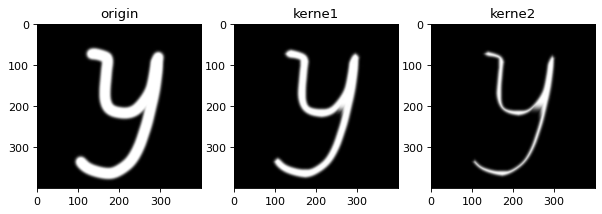

In [2]:
# imread
img = cv2.imread(r'.\images\advanced\liti_1.jpg', 0)
kerne1 = np.ones((9,9), np.uint8)
kerne2 = np.ones((17,17), np.uint8)
img_erode_kerne1 = cv2.erode(img, kerne1)
img_erode_kerne2 = cv2.erode(img, kerne2)
# imshow()
plt.figure(figsize=(9,3), dpi=80)
plt.subplot(1, 3, 1)
plt.imshow(img, 'gray')
plt.title("origin")
plt.subplot(1, 3, 2)
plt.imshow(img_erode_kerne1, 'gray')
plt.title("kerne1")
plt.subplot(1, 3, 3)
plt.imshow(img_erode_kerne2, 'gray')
plt.title("kerne2")

* 思考：下图那边是腐蚀前，哪边是腐蚀后
     <img src=".\images\advanced\Erosion2.jpg" style="zoom:70%;">

### 1.3.2 Dilate 膨胀
* 腐蚀可以看作是将图像X中每一与结构元素S全等的子集S+x收缩为点x。反之，也可以将X中的每一个点x扩大为S+x，这就是膨胀运算，记为X ⊕ S。若用集合语言，它的定义为：
$$
    X⊕S = \{ (S+x)\cap X \neq \phi \}
$$
* 与上式等价的膨胀定义式还有：
$$
    X⊕S = \cup \{ X+s | s \in S \}
$$
$$
    X⊕S = \cup \{ S+x | x \in X \}
$$
* 其他表述方式：
   * This operations consists of convolving an image $A$ with some kernel $B$, which can have any shape or size, usually a square or circle. 
   * The kernel $B$ has a defined anchor point, usually being the center of the kernel. 
   * As the kernel $B$ is scanned over the image, we compute the ***maximal*** pixel value overlapped by $B$ and replace the image pixel in the anchor point position with that maximal value. As you can deduce, this maximizing operation causes bright regions within an image to "grow" (therefore the name dilation)

    $$
    \operatorname{dst}(x, y)=\max _{\left(x^{\prime}, y^{\prime}\right): \text { element }\left(x^{\prime}, y^{\prime}\right) \neq 0} \operatorname{src}\left(x+x^{\prime}, y+y^{\prime}\right)
    $$


* 例子：
    <img src=".\images\advanced\Dilate.jpg" style="zoom:70%;">

In [1]:
# import
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'kerne2')

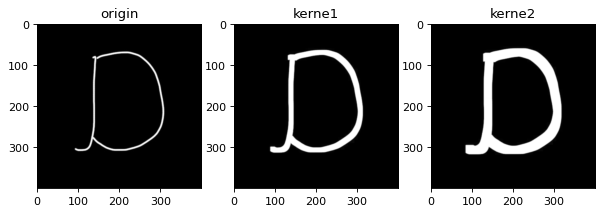

In [2]:
# dilate
img2 = cv2.imread(r'.\images\advanced\liti_2.jpg', 0)
kerne1 = np.ones((9,9), np.uint8)
kerne2 = np.ones((17,17), np.uint8)
img_dilate_kernel = cv2.dilate(img2, kerne1)
img_dilate_kerne2 = cv2.dilate(img2, kerne2)
# plt
plt.figure(figsize=(9,3), dpi=80)
plt.subplot(1, 3, 1)
plt.imshow(img2, 'gray')
plt.title("origin")
plt.subplot(1, 3, 2)
plt.imshow(img_dilate_kernel, 'gray')
plt.title("kerne1")
plt.subplot(1, 3, 3)
plt.imshow(img_dilate_kerne2, 'gray')
plt.title("kerne2")

### 1.3.3 Opening 开运算
* **开运算**：用同一个结构元素S，先对图像X进行**腐蚀然后膨胀**，用集合表示为：
    $$
        X ∘ S = (X ⊖ S)⊕S
    $$
* 部分规律：
    * 当使用圆盘结构元素，对边界进行平滑，**去除凸角**
    * 使用线段结构元素，沿线段方向宽度较大的部分才能够被保留下来，而较小的凸部将被剔除
        <img src=".\images\advanced\opening.png" style="zoom:70%;">

In [1]:
# import
import cv2
import numpy as np
import matplotlib.pyplot as plt

img3 = cv2.imread(r'.\images\advanced\liti_3.jpg', 0)

In [2]:
# opening
def show_opening(img, kernel_type="circle"):
    # 设置绘图大小
    plt.figure(figsize=(6,7), dpi=80)
    for i in range(4):
        plt.subplot(2, 2, 1 + i)
        # 椭圆结构 kernel
        if not i:
            plt.imshow(img,"gray")
            plt.title("origin")
            continue
        if kernel_type == "circle":
            kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1+i*4, 1+i*4)) 
            plt.imshow(cv2.dilate(cv2.erode(img, kernel), kernel),"gray")
            plt.title("circle kernel, size=({}, {})".format(1+i*4, 1+i*4) if i else "origin")
        # 矩形结构 kernel
        elif kernel_type == "rect":
            kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (35, i*3))
            plt.imshow(cv2.dilate(cv2.erode(img, kernel), kernel),"gray")
            plt.title("rect kernel, size=({}, {})".format(35, i*3) if i else "origin")
        # kernel类型错误
        else:
            print("Error: Invalid process_type!")


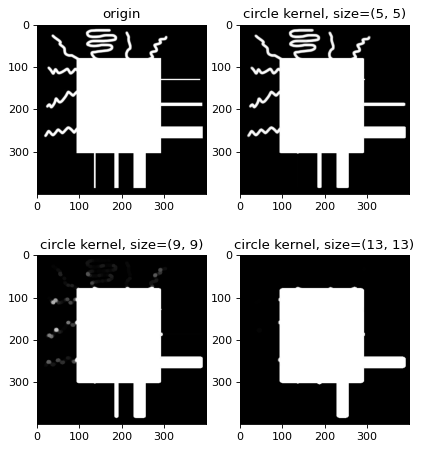

In [3]:
# 椭圆结构 kernel
show_opening(img3)

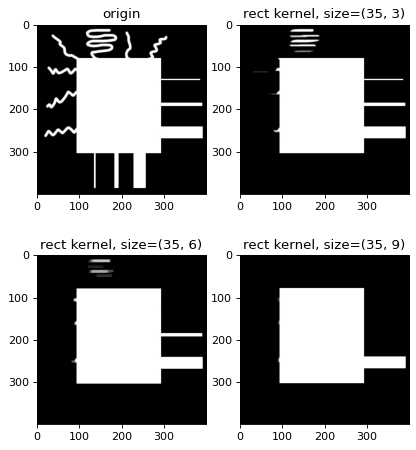

In [4]:
# 矩形结构 kernel
show_opening(img3, kernel_type="rect")

### 1.3.4 Closing 闭运算
* **闭运算**：用同一个结构元素S，先对图像X进行**膨胀然后腐蚀**，用集合表示为：
    $$
        X · S = (X ⊕ S)⊖S
    $$
* 部分规律：
    * 使用圆盘结构元素，对边界进行平滑，**填充凹角**；
    * 使用线段结构元素，沿线段方向宽度较大的部分也能够被填充下来。
    <img src=".\images\advanced\closing.png" style="zoom:70%;">

In [1]:
# import
import cv2
import numpy as np
import matplotlib.pyplot as plt

img4 = cv2.imread(r'.\images\advanced\liti_4.jpg', 0)

In [2]:
# closing
def show_closing(img, kernel_type="circle"):
    # 设置绘图大小
    plt.figure(figsize=(6,7), dpi=80)
    for i in range(4):
        plt.subplot(2, 2, 1 + i)
        # 椭圆结构 kernel
        if not i:
            plt.imshow(img,"gray")
            plt.title("origin")
            continue
        if kernel_type == "circle":
            kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (i*4, i*4)) 
            plt.imshow(cv2.erode(cv2.dilate(img, kernel), kernel),"gray")
            plt.title("circle kernel, size=({}, {})".format(i*4, i*4) if i else "origin")
        # 矩形结构 kernel
        elif kernel_type == "rect":
            kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (35, i*4))
            plt.imshow(cv2.erode(cv2.dilate(img, kernel), kernel),"gray")
            plt.title("rect kernel, size=({}, {})".format(35, i*4) if i else "origin")
        # kernel类型错误
        else:
            print("Error: Invalid process_type!")

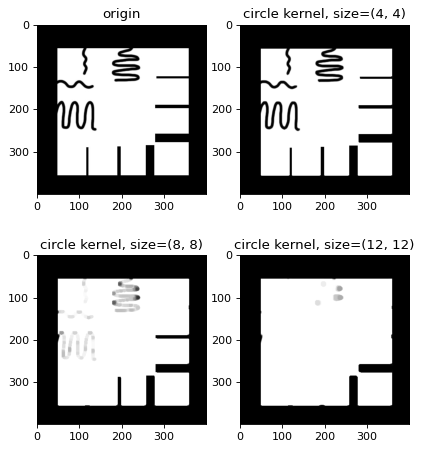

In [3]:
# 椭圆结构 kernel
show_closing(img4)

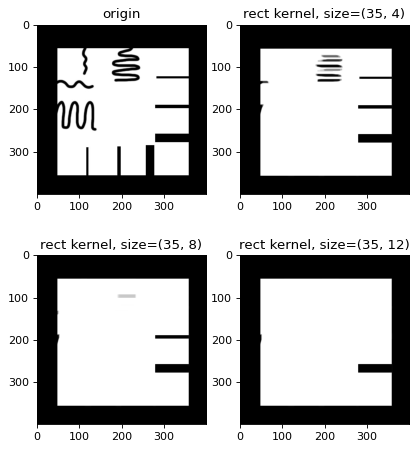

In [4]:
# 矩形结构 kernel
show_closing(img4, kernel_type="rect")

### #1.3.5 GRADIENT 形态学梯度
* 膨胀图像(扩张亮度)-腐蚀图像(收缩亮度)

In [1]:
# import
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'kerne2')

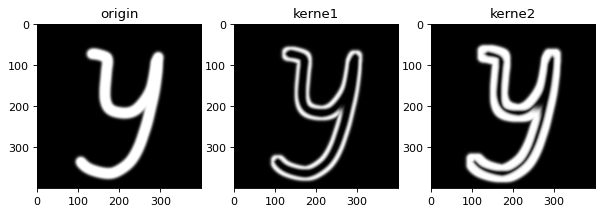

In [2]:
# imread
img = cv2.imread(r'.\images\advanced\liti_1.jpg', 0)
kerne1 = np.ones((9,9), np.uint8)
kerne2 = np.ones((17,17), np.uint8)
img_grad_k1 = cv2.dilate(img, kerne1) - cv2.erode(img, kerne1)
img_grad_k2 = cv2.dilate(img, kerne2) - cv2.erode(img, kerne2)
# imshow()
plt.figure(figsize=(9,3), dpi=80)
plt.subplot(1, 3, 1)
plt.imshow(img, 'gray')
plt.title("origin")
plt.subplot(1, 3, 2)
plt.imshow(img_grad_k1, 'gray')3
plt.title("kerne1")
plt.subplot(1, 3, 3)
plt.imshow(img_grad_k2, 'gray')
plt.title("kerne2")

### #1.3.6 TOP-HAT 礼帽运算
* 原图-开运算图
* 礼帽运算可以获得图像的噪声信息，或者得到比原始图的边缘更亮的边缘信息。

In [1]:
# import
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'kerne2')

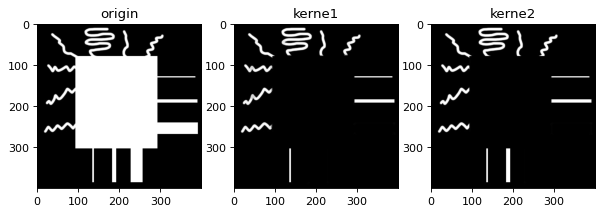

In [2]:
# imread
img3 = cv2.imread(r'.\images\advanced\liti_3.jpg', 0)
kerne1 = np.ones((9,9), np.uint8)
kerne2 = np.ones((17,17), np.uint8)
img_tophat_k1 = img3 - cv2.dilate(cv2.erode(img3, kerne1), kerne1)
img_tophat_k2 = img3 - cv2.dilate(cv2.erode(img3, kerne2), kerne2)
# imshow()
plt.figure(figsize=(9,3), dpi=80)
plt.subplot(1, 3, 1)
plt.imshow(img3, 'gray')
plt.title("origin")
plt.subplot(1, 3, 2)
plt.imshow(img_tophat_k1, 'gray')
plt.title("kerne1")
plt.subplot(1, 3, 3)
plt.imshow(img_tophat_k2, 'gray')
plt.title("kerne2")

### #1.3.7 黑帽运算
* 闭运算图像-原始算图
* 黑帽运算可以获得图像内部的噪音，或者得到比原始图的边缘更暗的边缘信息。

In [1]:
# import
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'kerne2')

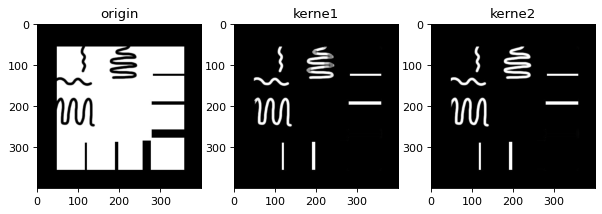

In [2]:
# imread
img4 = cv2.imread(r'.\images\advanced\liti_4.jpg', 0)
kerne1 = np.ones((9,9), np.uint8)
kerne2 = np.ones((17,17), np.uint8)
img_blackhat_k1 = cv2.erode(cv2.dilate(img4, kerne1), kerne1) - img4
img_blackhat_k2 = cv2.erode(cv2.dilate(img4, kerne2), kerne2) - img4
# imshow()
plt.figure(figsize=(9,3), dpi=80)
plt.subplot(1, 3, 1)
plt.imshow(img4, 'gray')
plt.title("origin")
plt.subplot(1, 3, 2)
plt.imshow(img_blackhat_k1, 'gray')
plt.title("kerne1")
plt.subplot(1, 3, 3)
plt.imshow(img_blackhat_k2, 'gray')
plt.title("kerne2")

### 在真实图片上测试形态学操作

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(480, 860)


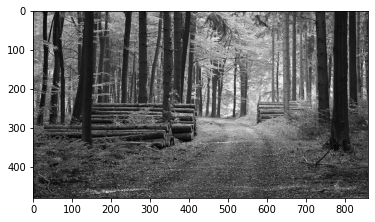

In [2]:
img_ori = cv2.imread(r".\images\forest.jpg", 0)
print(img_ori.shape)
plt.imshow(img_ori, "gray")

In [3]:
def show_morphological(img, process_type=1):
    kernel = np.ones((5,5), np.uint8)
    plt.figure(figsize=(12, 7))
    plt.subplot(2, 2, 1)
    plt.imshow(img, "gray"), plt.title("Original")
    for i in range(3):
        plt.subplot(2, 2, 2 + i)
        if process_type == 1:
            plt.imshow(cv2.dilate(img, kernel, iterations=i+1), "gray")
        elif process_type == 2:
            plt.imshow(cv2.erode(img, kernel, iterations=i+1), "gray")
        else:
            print("Error: Invalid process_type!")
        plt.title("Iterations = " + str(i+1))

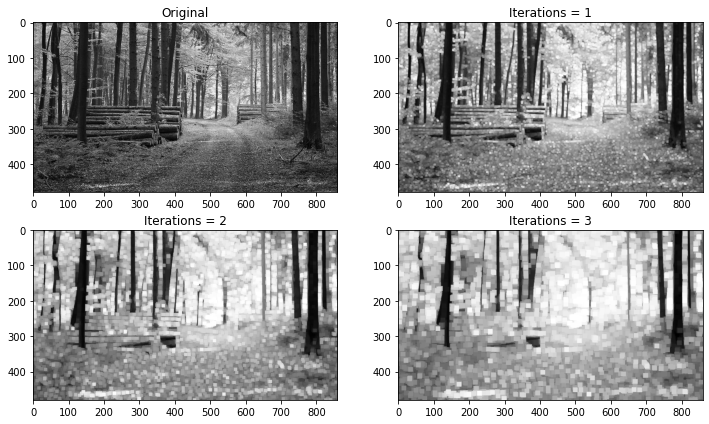

In [4]:
show_morphological(img_ori, process_type=1)

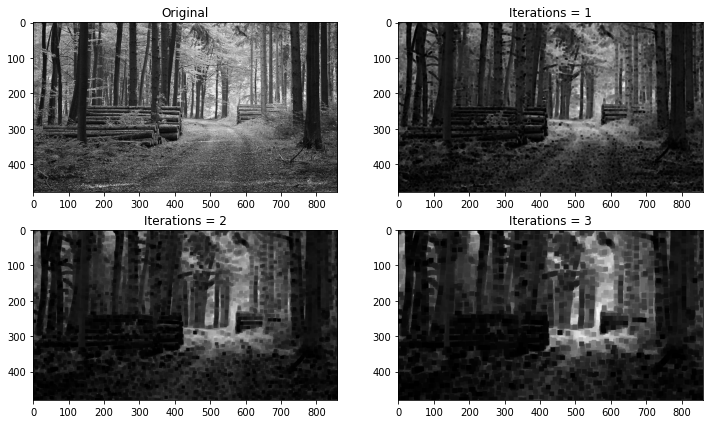

In [5]:
show_morphological(img_ori, process_type=2)

In [6]:
def show_morphology_specific(img, type_process=1):
    kernel = np.ones((5, 5), np.uint8)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img, "gray"), plt.title("ORIGINAL")
    op_s = [cv2.MORPH_OPEN, cv2.MORPH_CLOSE, cv2.MORPH_GRADIENT, 
            cv2.MORPH_TOPHAT, cv2.MORPH_BLACKHAT]
    titles = ["OPEN", "CLOSE", "GRADIENT", "TOP-HAT", "BLACK-HAT"]
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.morphologyEx(img, op_s[type_process - 1], kernel), "gray")
    plt.title(titles[type_process - 1])

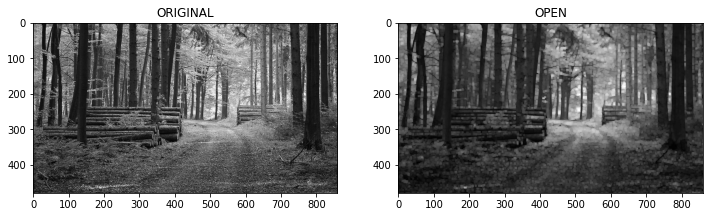

In [7]:
show_morphology_specific(img_ori, type_process=1)

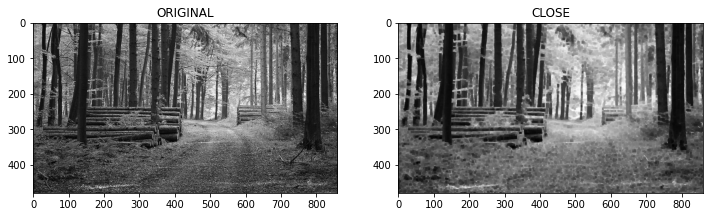

In [8]:
show_morphology_specific(img_ori, type_process=2)

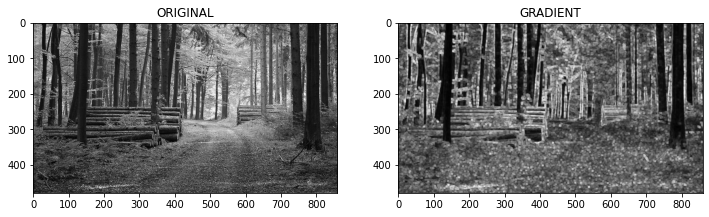

In [9]:
show_morphology_specific(img_ori, type_process=3)

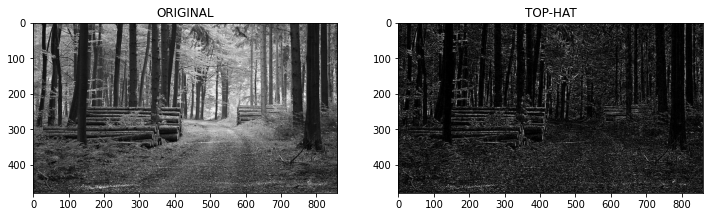

In [10]:
show_morphology_specific(img_ori, type_process=4)

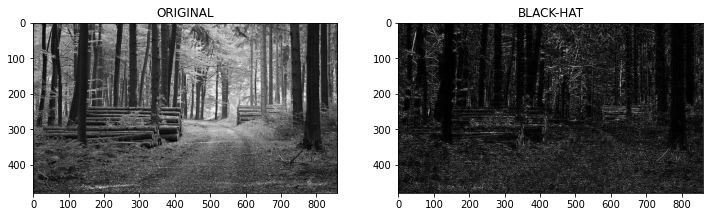

In [11]:
show_morphology_specific(img_ori, type_process=5)

In [12]:
def show_morphology(img):
    kernel = np.ones((5, 5), np.uint8)
    plt.figure(figsize=(21, 8))
    plt.subplot(2, 3, 1)
    plt.imshow(img, "gray"), plt.title("ORIGINAL")
    op_s = [cv2.MORPH_OPEN, cv2.MORPH_CLOSE, cv2.MORPH_GRADIENT, 
            cv2.MORPH_TOPHAT, cv2.MORPH_BLACKHAT]
    titles = ["OPEN", "CLOSE", "GRADIENT", "TOP-HAT", "BLACK-HAT"]
    for i in range(5):
        plt.subplot(2, 3, i + 2)
        plt.imshow(cv2.morphologyEx(img, op_s[i], kernel), "gray")
        plt.title(titles[i])

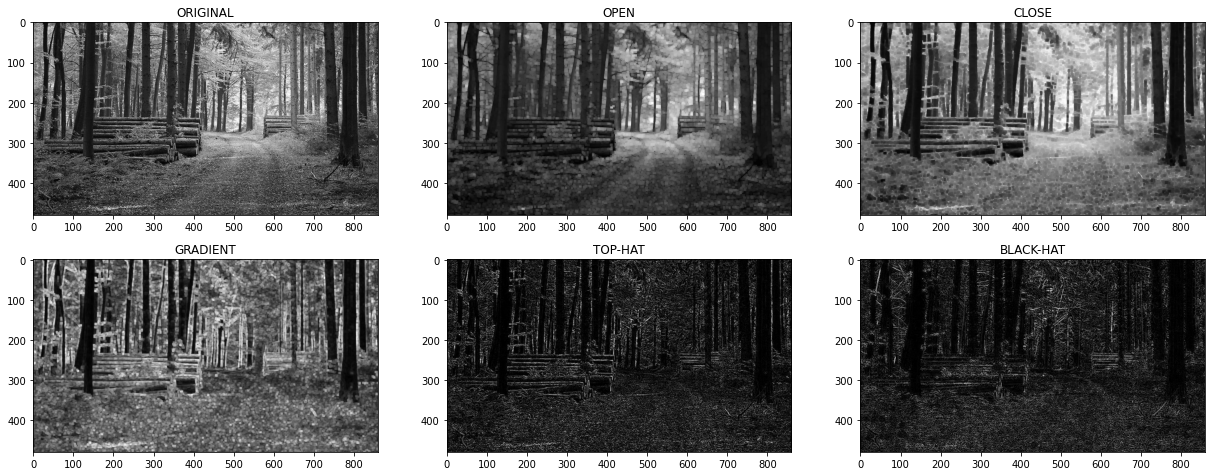

In [13]:
show_morphology(img_ori)

## The End

2023.4